In [145]:
from pylab import rcParams
rcParams['figure.figsize']=[10,10]
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

In [146]:
test_a = cv.imread('D:/test.jpg')

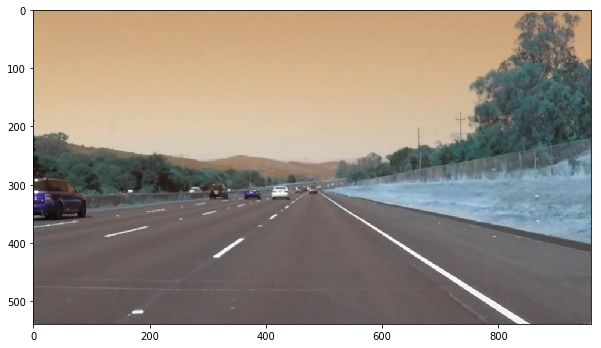

In [147]:
plt.imshow(test_a)

In [114]:
test.shape

(540, 960, 3)

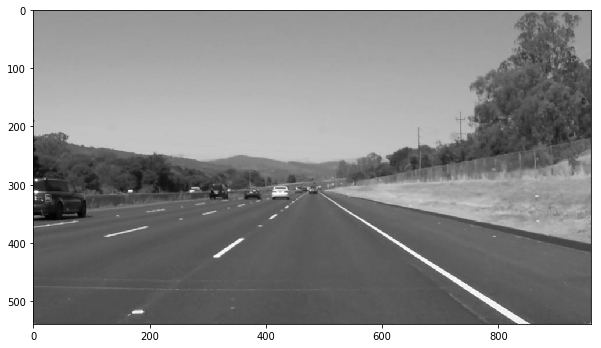

In [115]:
#Convert the image to grayscale for processing
test = cv.cvtColor(test, cv.COLOR_BGR2GRAY)
plt.imshow(test, cmap='gray')

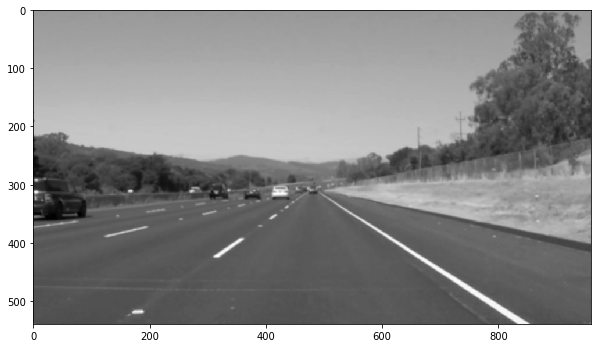

In [116]:
test_b = cv.GaussianBlur(test, (5,5),0)
plt.imshow(test_b,cmap='gray')

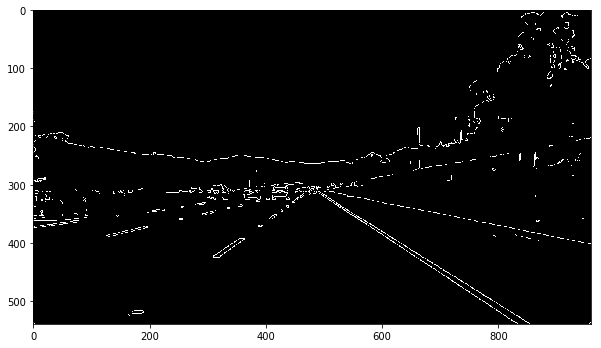

In [117]:
#Canny edge detection
test_c = cv.Canny(test,120,200)
plt.imshow(test_c,cmap='gray')

In [118]:
#generate a black mask
mask = np.zeros_like(test_c)

In [119]:
#points which we want to draw over mask
p = np.array([(150,540),(450,300),(870,540)])
p

array([[150, 540],
       [450, 300],
       [870, 540]])

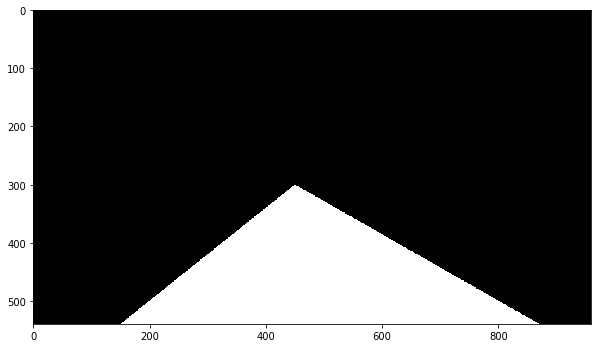

In [120]:
#create the region
reg = cv.fillPoly(mask,[p],255)
plt.imshow(reg,cmap='gray')

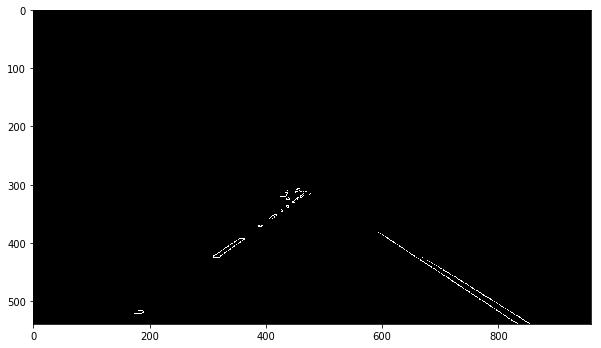

In [121]:
#now we are finding the edges which is coming in this region
reg_b = cv.bitwise_and(test_c,reg)
plt.imshow(reg_b,cmap='gray')

In [135]:
#FIND LINES USING A HOUGH TRANSFORM
#define the hough transform parameters
lines = cv.HoughLinesP(
    reg_b,
    rho = 6,
    theta =np.pi/60,
    threshold = 160,
    lines = np.array([]),
    minLineLength = 10,
    maxLineGap = 5
)


In [136]:
lines.shape

(12, 1, 4)

In [137]:
line_img = np.zeros(
    (
        test.shape[0],
        test.shape[1],
        3
    
    ),
    dtype = np.uint8
)

In [140]:
lines = lines.reshape(12,4)
for line in lines:
    x1,y1,x2,y2 = line
    cv.line(line_img,(x1,y1),(x2,y2),(255,0,0),5)
    

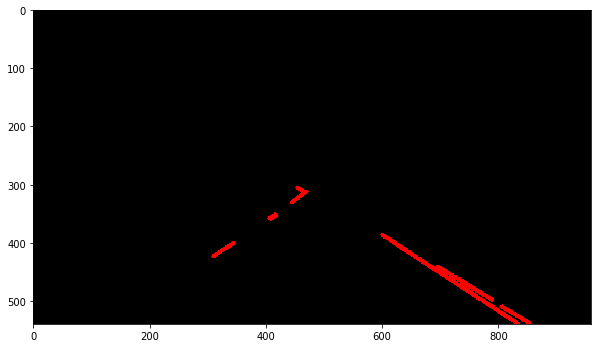

In [141]:
plt.imshow(line_img)

In [148]:
cb = cv.addWeighted(test_a.copy(),0.8,line_img.copy(),1,1)

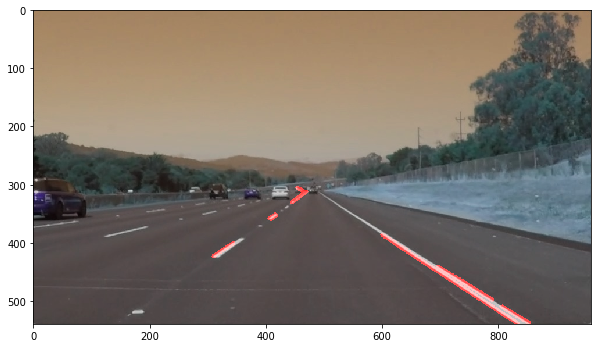

In [149]:
plt.imshow(cb)